The shortest imports cell I've ever written.

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

Let's convert a basic date to a datetime object using pandas. Documentation for the symbols can be found [here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [67]:
pd.to_datetime('January 1st, 1970')

Timestamp('1970-01-01 00:00:00')

Let's read in the data for the lesson.

In [68]:
url = "https://gist.githubusercontent.com/ryanorsinger/b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)
print(df.dtypes)
df.head()

date                   object
coffee_consumption    float64
dtype: object


,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


Our date column is currently an object. We need to convert it to datetime! Thankfully, with pandas vectorized operations, we can convert an entire column to datetime at once.

In [69]:
df.date = pd.to_datetime(df.date)
df.date.head()

0   2019-01-01
1   2019-01-02
2   2019-01-03
3   2019-01-04
4   2019-01-07
Name: date, dtype: datetime64[ns]

Let's access some attributes of our datetime objects.

In [70]:
df.date.dt.day_name().head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4       Monday
Name: date, dtype: object

It's very important to set the datetime object as the index and sort it. The dates farthest in the past will be at the top of the dataframe, and the most recent dates will be at the bottom (ascending = True).

In [71]:
df = df.set_index('date').sort_values(by='date')
df.head()

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563


We can change the period of our data. We can:
- Upsample: increase the number of data points by decreasing the time between points
- Downsample: decrease the number of data points by increasing the time between points

We will use the .asfreq() method to achieve this. Note that this technique may introduce null values into the dataset!

In [73]:
df = df.asfreq('d')
df.head()

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,NaN


We can fill those missing values with a fixed value, a forward fill, or a back fill. Let's see what happens.

In [74]:
df.coffee_consumption.ffill().head(10)

date
2019-01-01    14.301915
2019-01-02    12.905900
2019-01-03    10.046015
2019-01-04     6.354805
2019-01-05     6.354805
2019-01-06     6.354805
2019-01-07     8.545563
2019-01-08     9.410101
2019-01-09     7.219271
2019-01-10     9.338456
Freq: D, Name: coffee_consumption, dtype: float64

In [75]:
df = df.fillna(0)
df.head()

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,0.000000


We can also change the period of our data using the .resample() method. This method requires an aggregate operation, much like a groupby!

In [76]:
df.resample('w').mean().head()

,coffee_consumption
date,
2019-01-06,7.268106
2019-01-13,6.626580
2019-01-20,7.332212
2019-01-27,6.921614
2019-02-03,7.599649


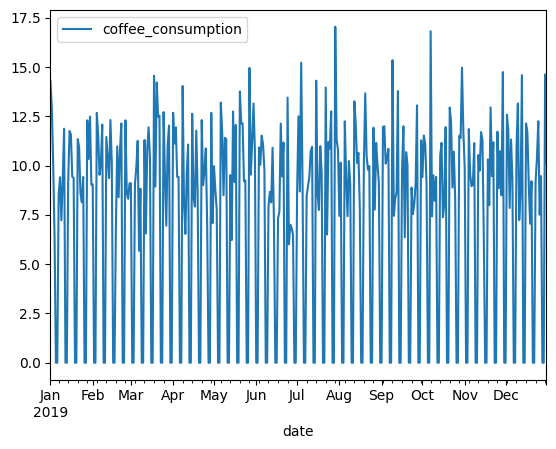

In [77]:
df.plot()
plt.show()

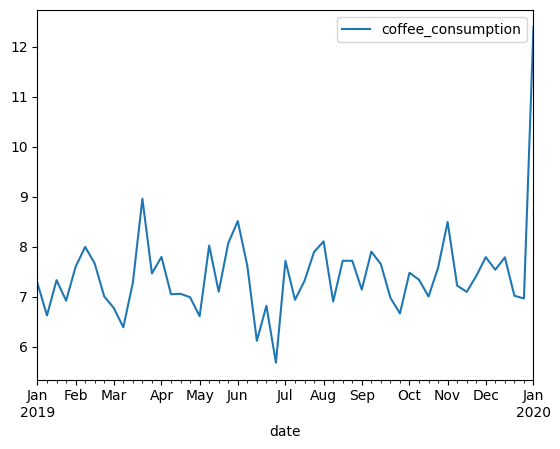

In [78]:
df.resample('w').mean().plot()
plt.show()

We can use the .rolling() method to calculate some aggregate metric over the last "i" data points.

In [79]:
df.head()

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,0.000000


In [80]:
df['rolling_3day'] = df.coffee_consumption.rolling(3).mean()
df.head()

,coffee_consumption,rolling_3day
date,,
2019-01-01,14.301915,NaN
2019-01-02,12.905900,NaN
2019-01-03,10.046015,12.417943
2019-01-04,6.354805,9.768907
2019-01-05,0.000000,5.466940


We can use .diff() and .shift() to make comparisons between datapoints.

In [81]:
df['shift2'] = df.coffee_consumption.shift(2)
df.head()

,coffee_consumption,rolling_3day,shift2
date,,,
2019-01-01,14.301915,NaN,NaN
2019-01-02,12.905900,NaN,NaN
2019-01-03,10.046015,12.417943,14.301915
2019-01-04,6.354805,9.768907,12.905900
2019-01-05,0.000000,5.466940,10.046015


In [82]:
df.coffee_consumption.diff(7)

date
2019-01-01         NaN
2019-01-02         NaN
2019-01-03         NaN
2019-01-04         NaN
2019-01-05         NaN
                ...   
2019-12-27    0.255897
2019-12-28    0.000000
2019-12-29    0.000000
2019-12-30    5.460643
2019-12-31   -0.204085
Freq: D, Name: coffee_consumption, Length: 365, dtype: float64

A little .strftime() fun.

In [83]:
df['my_column'] = df.index.strftime('%b-%d')
df.head()

,coffee_consumption,rolling_3day,shift2,my_column
date,,,,
2019-01-01,14.301915,NaN,NaN,Jan-01
2019-01-02,12.905900,NaN,NaN,Jan-02
2019-01-03,10.046015,12.417943,14.301915,Jan-03
2019-01-04,6.354805,9.768907,12.905900,Jan-04
2019-01-05,0.000000,5.466940,10.046015,Jan-05


Idmax and Idxmin

In [84]:
df.rolling_3day.idxmax()

Timestamp('2019-03-22 00:00:00')

In [85]:
df.rolling_3day.idxmin()

Timestamp('2019-01-06 00:00:00')